In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import bin_tools
import lightkurve as lk
from wotan import flatten
import time

from OrionPY import OrionTools, Tools

In [ ]:
%time
orion_means = OrionTools()

In [ ]:
### Reproducing mag vs err plot without binning

idx = np.isfinite(orion_means.gaia_gmag) & np.isfinite(orion_means.mag_mean)

(gradient, intercept) = np.polyfit(
            orion_means.mag_mean[idx],
            orion_means.gaia_gmag[idx],
            1,
            w = orion_means.gaia_gmag_err[idx])

plt.plot(orion_means.mag_mean, orion_means.gaia_gmag, linestyle='', marker='o', markersize = 0.6)
plt.show()
intercept

In [ ]:
mag_cali = orion_means.mag_mean + intercept


In [ ]:
non_zero = np.argwhere(orion_means.mag_rms != 0)

plt.plot(mag_cali[non_zero], orion_means.mag_rms[non_zero], linestyle = '', marker = 'o', markersize = 0.6)
plt.ylabel(r'$m_{RMS}$')
plt.xlabel(r'$m_{cal}$')
plt.yscale('log')


In [ ]:
### Reproducing with binning
obj_1000 = OrionTools(1000)
time_rebin, flux_rebin, junk = bin_tools.rebin_err_chunks(obj_1000.time, obj_1000.flux, dt=(1/240), max_gap=0.5)

# obj_1000.mag = -2.5*np.log10(obj_1000.flux)
flux_rebin_mag = -2.5*np.log10(flux_rebin)
mean_mag = np.nanmean(flux_rebin_mag)

mean = np.nanmean(-2.5*np.log10(obj_1000.flux))
print(mean)
orion_means.mag_mean[1000]

# time_rebin, flux_rebin, junk = bin_tools.rebin_err_chunks(, flux, dt=(1/240), max_gap=0.5)

In [ ]:
rebinned_means = np.zeros(np.size(orion_means.mag_mean))
rebinned_rms = np.zeros(np.size(orion_means.mag_mean))

for i in np.arange(np.size(rebinned_means)):
    obj = OrionTools(i)
    obj.rebin()
    obj.rebinned_vals()
    rebinned_means[i] = obj.calc_mag_mean
    rebinned_rms[i] = obj.calc_mag_rms

In [ ]:
obj = OrionTools(1000)
obj.rebin()
np.size(obj.mag_rebin)

In [ ]:
%%time
data = Tools()

In [ ]:
idx = np.isfinite(data.gaia_gmag) & np.isfinite(data.imag_mean)

(gradient, intercept) = np.polyfit(
            data.imag_mean[idx],
            data.gaia_gmag[idx],
            1,
            w = data.gaia_gmag_err[idx])

plt.plot(data.imag_mean, data.gaia_gmag, linestyle='', marker='o', markersize = 0.6)
plt.show()
intercept

In [ ]:
mag = data.imag_mean + intercept

plt.plot(mag, data., linestyle='', marker='o', markersize = 0.6)
plt.show()
intercept

In [ ]:
### This seems right!





mag_mean = data.hdu['catalogue'].data['mag_mean']
mag_rms = data.hdu['catalogue'].data['mag_rms']

idx = np.isfinite(data.gaia_gmag) & np.isfinite(mag_mean)

(gradient, intercept) = np.polyfit(
            data.flux_mean[idx],
            data.gaia_gmag[idx],
            1,
            w = data.gaia_gmag_err[idx])
%matplotlib notebook
plt.plot(mag_mean, data.gaia_gmag, linestyle='', marker='o', markersize = 0.6)
plt.ylabel(r'Gaia Gmag')
plt.xlabel(r'NGTS mean mag')
plt.show()
intercept

In [ ]:
%%time
rebin = bin_tools.rebin_err_chunks(data.time[0], data.mag[0], dt=(1/240), max_gap=0.5)

In [ ]:
flux_time_stack = np.stack((data.time, data.flux), axis = 2)

In [ ]:
print(flux_time_stack)

In [ ]:

%%time

j= 0


for i in flux_time_stack:
    flux, time, junk = bin_tools.rebin_err_chunks(i[:,0], i[:,1], dt=(1/240), max_gap=0.5)
    
    j += 1
    if j == 3: break



In [ ]:
### Now have rebinned data. Calculating RMS and magnitude
#- data[object, index of data][0 = time, 1 = flux]

In [3]:
### Load data as numpy array and remove empty arrays
data = np.load('/data/jpr64/rebinned_data_test.npy', allow_pickle = True)
# data = np.delete(data, np.where([y.size==0 for y in data])) 



In [ ]:
### THIS DOES NOT WORK

magnitudes_and_rms = np.empty((np.size(data),2))

def mag(flux):
    xdx = np.where(flux>0.0)
    return(-2.5*np.log10(flux[xdx]))

def rms(flux):
    return(np.sqrt((np.mean(np.square(flux))/np.size(flux))))


for i, j in enumerate(data):
#     print(j[:,1])
    mag_data = mag(j[:,1])
    print(mag_data)
    
    magnitudes_and_rms[i,0] = np.mean(mag_data)
    magnitudes_and_rms[i,1] = rms(mag_data)
    





    

In [ ]:
plt.plot(data[3149][:,0], data[3149][:,1], linestyle = '', marker = 'o', markersize = 0.6)

In [4]:
mean_mag = np.zeros(np.size(data))
rms_mag = np.zeros(np.size(data))

for i, j in enumerate(data):
        magnitudes = -2.5 * np.log10(j[:,1]) + 20.2
        mean_mag[i] = np.nanmean(magnitudes)
#         print(mean_mag[i])
        rms_mag[i] = np.sqrt(np.mean(np.square(mean_mag[i] - magnitudes)))
#         print(rms_mag[i])

/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


<IPython.core.display.Javascript object>


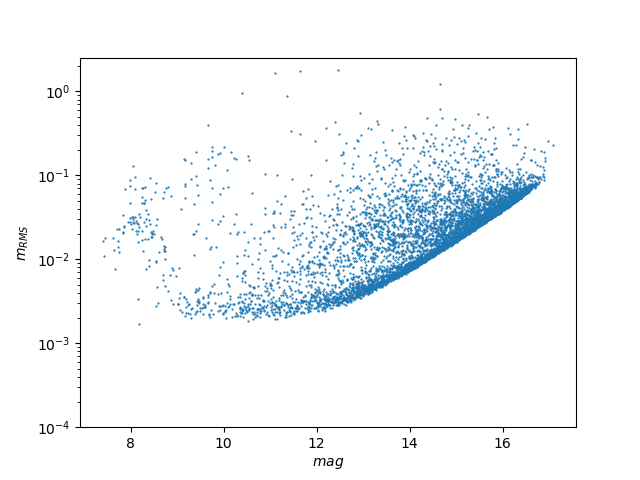

(0.0001, 2.529378185144657)

In [8]:
%matplotlib notebook
plt.plot(mean_mag, rms_mag, linestyle = '', marker = 'o', markersize = 0.6)
plt.ylabel(r'$m_{RMS}$')
plt.xlabel(r'$mag$')
plt.yscale('log')
plt.ylim(0.0001)

In [14]:
### Now to implement the LOWESS runs
data = np.load('/data/jpr64/rebinned_data_test.npy', allow_pickle = True)
idx = np.where([y.size==0 for y in data])
data = np.delete(data, idx) 



In [ ]:

%%time
i = 0
for j in ls:
    print(j)
    flatten_lc, trend_lc = flatten(
        j[:,0],                 # Array of time values
        j[:,1],                 # Array of flux values
        method='lowess',
        window_length = 0.5,    # The length of the filter window in units of ``time``
        break_tolerance = 0.3,    # Split into segments at breaks longer than that
        return_trend=True,    # Return trend and flattened light curve
        )
    i += 1
    print(i)
    if i == 10: break

In [5]:
ls = []
j = 0
for i in data:
    ls.append(i)
#     j+=1
    
#     if j == : break

In [47]:
from multiprocessing import Pool, cpu_count

def detrend(lcs):
    flatten_lc, trend_lc = flatten(
        lcs[:,0],                 # Array of time values
        lcs[:,1],                 # Array of flux values
        method='lowess',
        window_length = 0.5,    # The length of the filter window in units of ``time``
        break_tolerance = 0.3,    # Split into segments at breaks longer than that
        return_trend=True,    # Return trend and flattened light curve
        )
    return np.array((flatten_lc, trend_lc))

def magnitudes(lc):
    lc = lc.transpose()
    mags = mag(lc[:,1])
    mean_mag = np.nanmean(mags)
    rms_mag = np.sqrt(np.nanmean(np.square(mags - mean_mag)))
    return mean_mag, rms_mag

def magnitudes_original_data(lc):
    lc = lc.transpose()
    mags = mag(lc)
    mean_mag = np.nanmean(mags)
    rms_mag = np.sqrt(np.nanmean(np.square(mags - mean_mag)))
    return mean_mag, rms_mag
def mag(flux):
    return -2.5*np.log10(flux) 

In [1]:
### Generates detrended lc
# %%time

if __name__ == '__main__':
    with Pool(30) as p:
        ls_2 = p.map(detrend, ls)
        p.close()

NameError: name 'Pool' is not defined

In [48]:
### Calculates magnitudes and rms of detrended lc


if __name__ == '__main__':
    with Pool(30) as p:
        original_mags = p.map(magnitudes_original_data, tools.flux)
        p.close()

/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/s

/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [ ]:
### Recalculating mangitudes and rms for original data

In [10]:
ls_3 = np.array(ls_3)

In [ ]:
%matplotlib notebook
plt.plot(ls_3[:,0], ls_3[:,1], linestyle = '', marker = 'o', markersize = 0.6)
plt.ylabel(r'$m_{RMS}$')
plt.xlabel(r'$mag$')
plt.yscale('log')
plt.ylim(0.0001)

In [ ]:
### Plotting delta RMS for rebinned and LOWESS

In [11]:
# Loading old rms values

tools = Tools()


/home/jpr64/orion/Orion_main/OrionPY.py:71: RuntimeWarning: invalid value encountered in log10
  self.mag = -2.5*np.log10(self.flux)


In [61]:
original_mags = np.array(original_mags)
old_rms = original_mags[:,1]
old_rms = np.delete(old_rms, np.where(idx))
tools_rms = np.delete(tools.mag_rms, np.where(idx))
rebin_rms = rms_mag
detrend_rms = ls_3[:,1]

In [89]:
# Calculate delta rms

def delta_rms(rms):
    return(1 - (rms/old_rms))

delta_rebin = delta_rms(rebin_rms)
delta_detrend = delta_rms(detrend_rms)



<IPython.core.display.Javascript object>


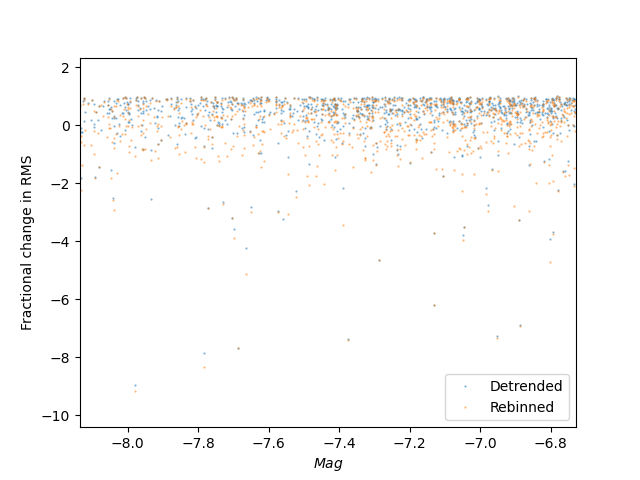

In [68]:
%matplotlib notebook
plt.plot( old_mean, delta_detrend , linestyle='', marker='o', markersize=0.6, alpha = 0.5, label='Detrended')
plt.plot( old_mean, delta_rebin, linestyle='', marker='o', markersize=0.6, alpha = 0.5, label='Rebinned')

plt.ylabel(r'Fractional change in RMS')
plt.xlabel(r'$Mag$')
# plt.yscale('log')
plt.legend()
# plt.ylim(0.0001)
plt.show()

<IPython.core.display.Javascript object>


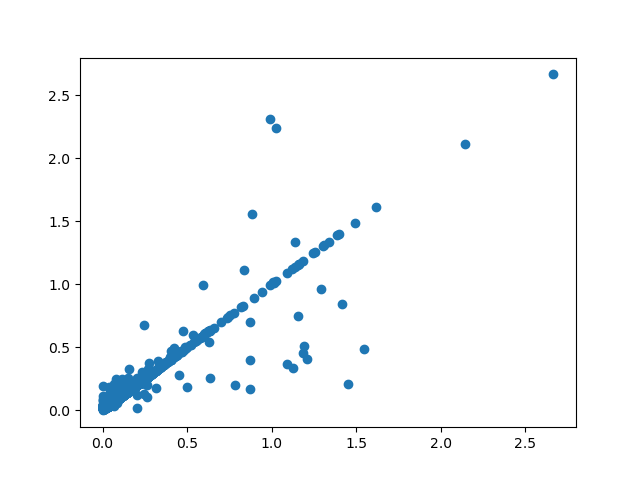

In [59]:
plt.figure()
plt.scatter(tools_rms, old_rms)

In [97]:
location = np.greater(rebin_rms, old_rms)
# print(np.count_nonzero(location))
flux = [i for i in tools.flux]

